# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

In [1]:
% matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
df.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [4]:
# Investigate dataset
df.groupby('race').call.size()

race
b    2435
w    2435
dtype: int64

## #1

In [5]:
len(df.call)

4870

A 2 sample test for difference in callback rate between black and white sounding names is appropriate.

The CLT does apply as n = 4870 > 30, i.e. n is large.

## #2

H<sub>0</sub>: there is no difference between the callback rates for black and white sounding names, i.e. diff in call back rate = 0  
H<sub>1</sub>: there **is** a difference between the callback rates for black and white sounding names

## #3

In [6]:
# Calculate and display different stats for the sample
call_rate_b = df[df.race=='b'].call.sum() / (len(df.call) / 2)
call_rate_w = df[df.race=='w'].call.sum() / (len(df.call) / 2)
mean_call_diff = call_rate_b - call_rate_w

b_var = (call_rate_b * (1 - call_rate_b)) / (len(df.call) / 2)
w_var = (call_rate_w * (1 - call_rate_w)) / (len(df.call) / 2)

b_std = np.sqrt(b_var / (len(df.call) / 2))
w_std = np.sqrt(w_var / (len(df.call) / 2))
sample_std = b_std + w_std

print('Sample call back rate for black names: %f' % (call_rate_b))
print('Sample call back rate for white names: %f' % (call_rate_w))
print('Diff in sample call back rates: %f' % (mean_call_diff))

print('\nSample margin of error: %f' % (sample_std * 2))
print('Sample 95%% confidence interval: [%f, %f]' % (mean_call_diff - 2 * sample_std, mean_call_diff + 2 * sample_std))

Sample call back rate for black names: 0.064476
Sample call back rate for white names: 0.096509
Diff in sample call back rates: -0.032033

Sample margin of error: 0.000444
Sample 95% confidence interval: [-0.032477, -0.031589]


In [7]:
def RunModel(df):
    # Resample via bootstrap
    # Randomly select observations from both black and white names as we are assuming no diff between the 2 groups
    # Input a dataframe with n observations and return 2 numpy arrays with n/2 observations
    data_b = np.random.choice(df.call, len(df.call)/2, replace=True)
    data_w = np.random.choice(df.call, len(df.call)/2, replace=True)
    return data_b, data_w

def TestStat(data):
    # Returns the test stat which in this case is the difference in call back rates
    data1, data2 = data
    call_diff = (data1.sum() / len(data1)) - (data2.sum() / len(data2))
    return call_diff

In [8]:
# Simulate 1000 experiments under the null
test_stats = pd.DataFrame([TestStat(RunModel(df)) for i in range(1000)])
test_stats.columns = ['call_diff']

C:\Users\richa\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\richa\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


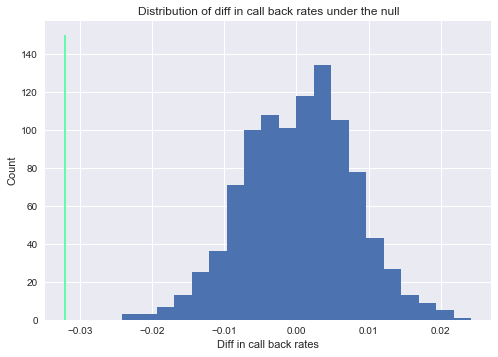

In [9]:
# Plot distribution of the test stat under the null vs observed test stat from the sample
plt.vlines(mean_call_diff, 0, 150, color=sns.xkcd_rgb['sea green'])
plt.hist(test_stats.call_diff, bins=20)
plt.xlabel('Diff in call back rates')
plt.ylabel('Count')
plt.title('Distribution of diff in call back rates under the null')
None

In [10]:
print('Margin of error under the null: %f' % (2 * test_stats.call_diff.std()))
print('95%% confidence interval under the null: [%f, %f]' % (test_stats.call_diff.mean() - 2 * test_stats.call_diff.std(),
                                                           test_stats.call_diff.mean() + 2 * test_stats.call_diff.std()))

Margin of error under the null: 0.015056
95% confidence interval under the null: [-0.014741, 0.015372]


In [12]:
z_score = (mean_call_diff - test_stats.call_diff.mean()) / test_stats.call_diff.std()
p_value = 1 - stats.norm(0,1).cdf(-z_score)

print('z score: %f' % (z_score))
print('p value: %f' % (p_value))

z score: -4.296966
p value: 0.000009


## #4

In our sample, we observed that there was a difference in call back rates between black and white names of -3.2%, i.e. black names are less likely to get called back.

We simulated 1000 experiments under the null hypothesis that there is no difference in call back rates. Under the null, our 95% confidence interval for the diff in call back rates is [-1.5%, 1.5%].

Our sample test stat of -3.2% has a z score of -4.19 and a p value < 0.001, which implies that under the null, there is less than 0.001 chance of seeing an observation as extreme as our sample stat. Thus, we reject the null and conclude that there is likely a difference between call back rates and that black names are likely to get called back less.

## #5

Our analysis does not mean that race is the most important factor when applying to jobs - it shows that race could be a factor, but we do not know if there any any confounding variables or variables with larger effect sizes. For example, years of experience, number of previous jobs, and years of education could all be important variables.

If I were to redo this analysis, I would test for independence of and difference in effect sizes of other key variables.